In [ ]:
import ROOT


# Set the batch mode
ROOT.gROOT.SetBatch()
ROOT.gStyle.SetOptStat(0)

# Create a canvas to draw the histogram
canvas = ROOT.TCanvas('canvas', "", 800, 800)




#Files
background_files = [
    "output_root/GGJets.root"
]

data_file_path = "output_root/Data_EraE.root"
variable = "lead_mvaID"


# Define colors for each background
background_colors = [
    ROOT.kBlue-5, ROOT.kGreen, ROOT.kRed, ROOT.kCyan,
    ROOT.kMagenta, ROOT.kYellow, ROOT.kOrange, ROOT.kViolet
]
# Create a legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)  # Adjust legend position
max_y = 1.2e5

file_1 = ROOT.TFile("output_root/GGJets.root", "READ")
file_2 = ROOT.TFile("output_root/GJetPt40.root")

tree_1 = file_1.Get("DiphotonTree/data_125_13TeV_NOTAG")
tree_2 = file_2.Get("DiphotonTree/data_125_13TeV_NOTAG")

hist_1 = ROOT.TH1F("", "", 50, 0, 1) 
hist_2 = ROOT.TH1F("", "", 50, 0, 1)


tree_1.Project(hist_1.GetName(), variable)
tree_2.Project(hist_2.GetName(), variable)

# Set histogram styles
hist_1.SetFillColorAlpha(ROOT.kBlue-5, 0.5)
hist_1.SetLineColor(ROOT.kBlack) 
hist_1.SetLineWidth(2)

hist_2.SetFillColorAlpha(ROOT.kGreen, 0.5)
hist_2.SetLineColor(ROOT.kBlack) 
hist_2.SetLineWidth(2)


# Stack histograms
stack = ROOT.THStack()
stack.Add(hist_1)
stack.Add(hist_2)

# Draw stacked histograms
stack.Draw("hist SAME")

# Add legend entries for each histogram
legend.AddEntry(hist_1, "GGJets", "f")  # "f" for filled histogram
legend.AddEntry(hist_2, "GJetPt20To40", "f")


data_file = ROOT.TFile(data_file_path, "READ")
data_tree = data_file.Get("DiphotonTree/data_125_13TeV_NOTAG")
hist_data = ROOT.TH1F("", "",50, 0, 1)  # Increased x-axis range to 1000
data_tree.Project(hist_data.GetName(), variable)

hist_data.SetLineColor(ROOT.kRed)
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1)


hist_data.Draw("E0 x0 SAME")

legend.AddEntry(hist_data, "Data", "p")

stack.GetXaxis().SetTitle(variable)
stack.GetYaxis().SetTitle("Events")

stack.SetMaximum(max_y)  # Set maximum y-axis value



canvas.SetLogy()

# Draw the legend
legend.Draw()

# Draw the canvas
canvas.Draw()


canvas.SaveAs("stacked_histogram.png")


In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Enable matplotlib to use ROOT
ROOT.gROOT.SetBatch(True)

# Function to read the histogram from a ROOT file and a specific tree
def get_histogram_from_tree(file_path, tree_name, variable_name, bins, range_min, range_max):
    file = ROOT.TFile.Open(file_path)
    if not file or file.IsZombie():
        raise FileNotFoundError(f"Cannot open file: {file_path}")
    
    tree = file.Get(tree_name)
    if not tree:
        raise ValueError(f"Tree '{tree_name}' not found in file: {file_path}")
    
    hist = ROOT.TH1F(f"hist_{variable_name}", f"{variable_name} distribution", bins, range_min, range_max)
    tree.Project(f"hist_{variable_name}", variable_name)
    
    hist.SetDirectory(0)
    file.Close()
    return hist

# Define file paths and tree names
data_file_path = "output_root/Data_EraE.root"
background_files = [
    "output_root/GGJets.root",
    "output_root/GJetPt20To40.root",
    "output_root/GJetPt40.root"
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"
variable_name = "lead_mvaID"
bins = 50  # Number of bins for the histogram
range_min = 0  # Minimum range for the histogram
range_max = 1  # Maximum range for the histogram

# Read the data histogram
try:
    data_hist = get_histogram_from_tree(data_file_path, tree_name, variable_name, bins, range_min, range_max)
except (FileNotFoundError, ValueError) as e:
    print(e)
    exit(1)

# Read the background histograms and stack them
background_hists = []
for f in background_files:
    try:
        hist = get_histogram_from_tree(f, tree_name, variable_name, bins, range_min, range_max)
        background_hists.append(hist)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        exit(1)

stack = ROOT.THStack("stack", "")

for hist in background_hists:
    stack.Add(hist)

# Plot the histograms
c = ROOT.TCanvas("c", "", 800, 600)
data_hist.SetMarkerStyle(20)
data_hist.SetMarkerSize(0.8)
data_hist.SetMarkerColor(ROOT.kBlack)
data_hist.SetLineColor(ROOT.kBlack)

stack.Draw("HIST")
data_hist.Draw("E SAME")

stack.GetXaxis().SetTitle("lead_mvaID")
stack.GetYaxis().SetTitle("Events")
stack.GetXaxis().SetTitleSize(0.04)
stack.GetYaxis().SetTitleSize(0.04)

# Add legend
legend = ROOT.TLegend(0.5, 0.7, 0.7, 0.9)
legend.AddEntry(data_hist, "Data", "lep")
legend.AddEntry(background_hists[0], "#gamma#gamma + jets (P_{T} > 40)", "f")
legend.AddEntry(background_hists[1], "#gamma#gamma + jets (40 > P_{T} > 20)", "f")
legend.AddEntry(background_hists[2], "#gamma#gamma + jets", "f")
legend.Draw()

# Save the canvas as a PNG file
c.SaveAs("output_plot.png")

# To show the plot
c.Draw()


In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Enable matplotlib to use ROOT
ROOT.gROOT.SetBatch(True)

# Function to read the histogram from a ROOT file and a specific tree
def get_histogram_from_tree(file_path, tree_name, variable_name, bins, range_min, range_max):
    file = ROOT.TFile.Open(file_path)
    if not file or file.IsZombie():
        raise FileNotFoundError(f"Cannot open file: {file_path}")
    
    tree = file.Get(tree_name)
    if not tree:
        raise ValueError(f"Tree '{tree_name}' not found in file: {file_path}")
    
    hist = ROOT.TH1F(f"hist_{variable_name}", f"{variable_name} distribution", bins, range_min, range_max)
    tree.Project(f"hist_{variable_name}", variable_name)
    
    hist.SetDirectory(0)
    file.Close()
    return hist

# Define file paths and tree names
data_file_path = "output_root/Data_EraE.root"
background_files = [
    "output_root/GGJets.root",
    "output_root/GJetPt20To40.root",
    "output_root/GJetPt40.root"
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"
variable_name = "lead_mvaID"
bins = 50  # Number of bins for the histogram
range_min = 0  # Minimum range for the histogram
range_max = 1  # Maximum range for the histogram

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

# Read the data histogram
try:
    data_hist = get_histogram_from_tree(data_file_path, tree_name, variable_name, bins, range_min, range_max)
except (FileNotFoundError, ValueError) as e:
    print(e)
    exit(1)

# Read the background histograms and stack them
background_hists = []
for i, f in enumerate(background_files):
    try:
        hist = get_histogram_from_tree(f, tree_name, variable_name, bins, range_min, range_max)
        hist.SetFillColor(background_colors[i])
        background_hists.append(hist)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        exit(1)

stack = ROOT.THStack("stack", "")

for hist in background_hists:
    stack.Add(hist)

# Create the canvas and pads
c = ROOT.TCanvas("c", "", 800, 800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Upper and lower plot are joined
pad1.Draw()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2)
pad2.Draw()

# Upper pad: the stack plot and data
pad1.cd()
data_hist.SetMarkerStyle(20)
data_hist.SetMarkerSize(0.8)
data_hist.SetMarkerColor(ROOT.kBlack)
data_hist.SetLineColor(ROOT.kBlack)

stack.Draw("HIST")
data_hist.Draw("E SAME")

stack.GetXaxis().SetTitle("")
stack.GetYaxis().SetTitle("Events")
stack.GetYaxis().SetTitleSize(20)
stack.GetYaxis().SetTitleFont(43)
stack.GetYaxis().SetTitleOffset(1.55)
stack.GetYaxis().SetLabelFont(43)
stack.GetYaxis().SetLabelSize(15)

# Add legend
legend = ROOT.TLegend(0.5, 0.6, 0.7, 0.8)
legend.AddEntry(data_hist, "Data", "lep")
legend.AddEntry(background_hists[2], "#gamma#gamma + jets", "f")
legend.AddEntry(background_hists[1], "#gamma#gamma + jets (40 > P_{T} > 20)", "f")
legend.AddEntry(background_hists[0], "#gamma#gamma + jets (P_{T} > 40)", "f")
legend.Draw()

# Lower pad: the ratio plot
pad2.cd()
ratio_hist = data_hist.Clone("ratio_hist")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

ratio_hist.Divide(mc_hist)
ratio_hist.SetMarkerStyle(20)
ratio_hist.SetMarkerSize(0.8)
ratio_hist.SetMarkerColor(ROOT.kBlack)
ratio_hist.SetLineColor(ROOT.kBlack)
ratio_hist.GetXaxis().SetTitle("lead_mvaID")
ratio_hist.GetYaxis().SetTitle("Data/MC")
ratio_hist.GetYaxis().SetNdivisions(505)
ratio_hist.GetYaxis().SetTitleSize(20)
ratio_hist.GetYaxis().SetTitleFont(43)
ratio_hist.GetYaxis().SetTitleOffset(1.55)
ratio_hist.GetYaxis().SetLabelFont(43)
ratio_hist.GetYaxis().SetLabelSize(15)
ratio_hist.GetXaxis().SetTitleSize(20)
ratio_hist.GetXaxis().SetTitleFont(43)
ratio_hist.GetXaxis().SetTitleOffset(3.0)
ratio_hist.GetXaxis().SetLabelFont(43)
ratio_hist.GetXaxis().SetLabelSize(15)

ratio_hist.Draw("EP")

# Save the canvas as a PNG file
c.SaveAs("output_plot.png")

# Clear the canvas before drawing again
# c.Clear()

# To show the plot
c.Draw()


## HHbbggCandidate_mass


Info in <TCanvas::Print>: png file output_plot.png has been created


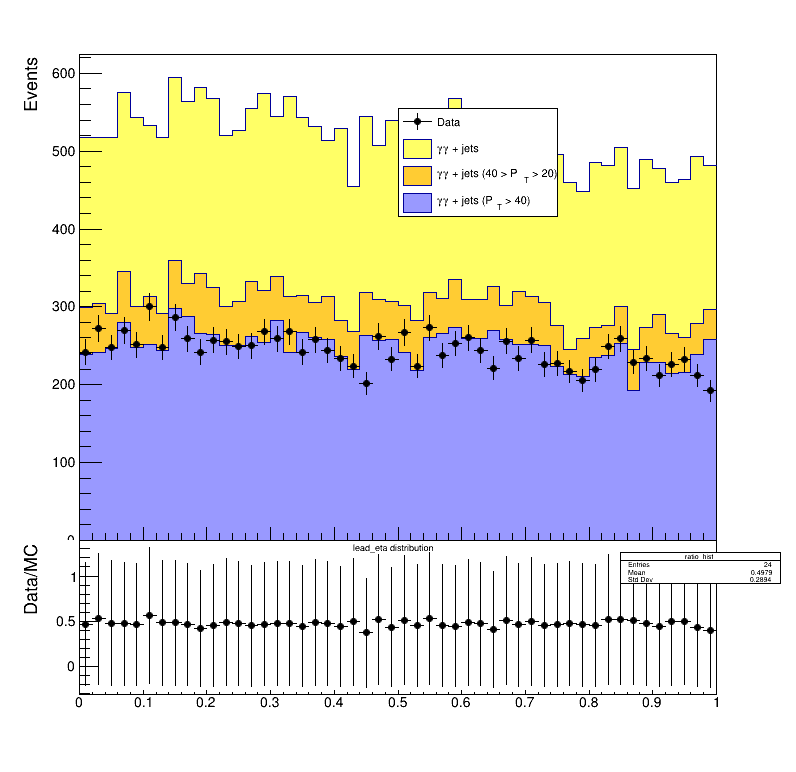

In [28]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Enable matplotlib to use ROOT
ROOT.gROOT.SetBatch(True)

# Function to read the histogram from a ROOT file and a specific tree
def get_histogram_from_tree(file_path, tree_name, variable_name, bins, range_min, range_max):
    file = ROOT.TFile.Open(file_path)
    if not file or file.IsZombie():
        raise FileNotFoundError(f"Cannot open file: {file_path}")
    
    tree = file.Get(tree_name)
    if not tree:
        raise ValueError(f"Tree '{tree_name}' not found in file: {file_path}")
    
    hist = ROOT.TH1F(f"hist_{variable_name}", f"{variable_name} distribution", bins, range_min, range_max)
    tree.Project(f"hist_{variable_name}", variable_name)
    
    hist.SetDirectory(0)
    file.Close()
    return hist

# Define file paths and tree names
data_file_path = "output_root/Data_EraE.root"
background_files = [
    "output_root/GGJets.root",
    "output_root/GJetPt20To40.root",
    "output_root/GJetPt40.root"
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"
variable_name = "lead_eta"
bins = 50  # Number of bins for the histogram
range_min = 0  # Minimum range for the histogram
range_max = 1  # Maximum range for the histogram

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

# Read the data histogram
try:
    data_hist = get_histogram_from_tree(data_file_path, tree_name, variable_name, bins, range_min, range_max)
except (FileNotFoundError, ValueError) as e:
    print(e)
    exit(1)

# Read the background histograms and stack them
background_hists = []
for i, f in enumerate(background_files):
    try:
        hist = get_histogram_from_tree(f, tree_name, variable_name, bins, range_min, range_max)
        hist.SetFillColor(background_colors[i])
        background_hists.append(hist)
    except (FileNotFoundError, ValueError) as e:
        print(e)
        exit(1)

stack = ROOT.THStack("stack", "")

for hist in background_hists:
    stack.Add(hist)

# Create the canvas and pads
c = ROOT.TCanvas("c", "", 800, 800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Upper and lower plot are joined
pad1.Draw()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2)
pad2.Draw()

# Upper pad: the stack plot and data
pad1.cd()
data_hist.SetMarkerStyle(20)
data_hist.SetMarkerSize(0.8)
data_hist.SetMarkerColor(ROOT.kBlack)
data_hist.SetLineColor(ROOT.kBlack)

stack.Draw("HIST")
data_hist.Draw("E SAME")

stack.GetXaxis().SetTitle("")
stack.GetYaxis().SetTitle("Events")
stack.GetYaxis().SetTitleSize(20)
stack.GetYaxis().SetTitleFont(43)
stack.GetYaxis().SetTitleOffset(1.55)
stack.GetYaxis().SetLabelFont(43)
stack.GetYaxis().SetLabelSize(15)

# Add legend
legend = ROOT.TLegend(0.5, 0.6, 0.7, 0.8)
legend.AddEntry(data_hist, "Data", "lep")
legend.AddEntry(background_hists[2], "#gamma#gamma + jets", "f")
legend.AddEntry(background_hists[1], "#gamma#gamma + jets (40 > P_{T} > 20)", "f")
legend.AddEntry(background_hists[0], "#gamma#gamma + jets (P_{T} > 40)", "f")
legend.Draw()

# Lower pad: the ratio plot
pad2.cd()
ratio_hist = data_hist.Clone("ratio_hist")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

ratio_hist.Divide(mc_hist)
ratio_hist.SetMarkerStyle(20)
ratio_hist.SetMarkerSize(0.8)
ratio_hist.SetMarkerColor(ROOT.kBlack)
ratio_hist.SetLineColor(ROOT.kBlack)
ratio_hist.GetXaxis().SetTitle("lead_mvaID")
ratio_hist.GetYaxis().SetTitle("Data/MC")
ratio_hist.GetYaxis().SetNdivisions(505)
ratio_hist.GetYaxis().SetTitleSize(20)
ratio_hist.GetYaxis().SetTitleFont(43)
ratio_hist.GetYaxis().SetTitleOffset(1.55)
ratio_hist.GetYaxis().SetLabelFont(43)
ratio_hist.GetYaxis().SetLabelSize(15)
ratio_hist.GetXaxis().SetTitleSize(20)
ratio_hist.GetXaxis().SetTitleFont(43)
ratio_hist.GetXaxis().SetTitleOffset(3.0)
ratio_hist.GetXaxis().SetLabelFont(43)
ratio_hist.GetXaxis().SetLabelSize(15)

ratio_hist.Draw("EP")

# Save the canvas as a PNG file
# c.SaveAs("output_plot.png")

# Clear the canvas before drawing again
# c.Clear()

# To show the plot
c.Draw()


In [ ]:
# removing the statistics from the lower plot

In [ ]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

# Disable batch mode to debug interactively
ROOT.gROOT.SetBatch(False)

# Function to read the histogram from a ROOT file and a specific tree
def get_histogram_from_tree(file_path, tree_name, variable_name, bins, range_min, range_max):
    file = ROOT.TFile.Open(file_path)
    if not file or file.IsZombie():
        raise FileNotFoundError(f"Cannot open file: {file_path}")
    
    tree = file.Get(tree_name)
    if not tree:
        raise ValueError(f"Tree '{tree_name}' not found in file: {file_path}")
    
    hist = ROOT.TH1F(f"hist_{variable_name}", f"{variable_name} distribution", bins, range_min, range_max)
    tree.Project(f"hist_{variable_name}", variable_name)
    
    hist.SetDirectory(0)
    file.Close()
    return hist

# Define file paths and tree names
data_file_path = "output_root/Data_EraE.root"
background_files = [
    "output_root/GGJets.root",
    "output_root/GJetPt20To40.root",
    "output_root/GJetPt40.root"
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"
variable_name = "lead_mvaID"
bins = 50  # Number of bins for the histogram
range_min = 0  # Minimum range for the histogram
range_max = 1  # Maximum range for the histogram

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

# Read the data histogram
try:
    data_hist = get_histogram_from_tree(data_file_path, tree_name, variable_name, bins, range_min, range_max)
    print(f"Data histogram has {data_hist.GetEntries()} entries.")
except (FileNotFoundError, ValueError) as e:
    print(e)
    exit(1)

# Read the background histograms and stack them
background_hists = []
for i, f in enumerate(background_files):
    try:
        hist = get_histogram_from_tree(f, tree_name, variable_name, bins, range_min, range_max)
        hist.SetFillColor(background_colors[i])
        background_hists.append(hist)
        print(f"Background histogram {i} from {f} has {hist.GetEntries()} entries.")
    except (FileNotFoundError, ValueError) as e:
        print(e)
        exit(1)

stack = ROOT.THStack("stack", "")

for hist in background_hists:
    stack.Add(hist)

# Create the canvas and pads
c = ROOT.TCanvas("c", "", 800, 800)
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Upper and lower plot are joined
pad1.Draw()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.2)
pad2.Draw()

# Upper pad: the stack plot and data
pad1.cd()
data_hist.SetMarkerStyle(20)
data_hist.SetMarkerSize(0.8)
data_hist.SetMarkerColor(ROOT.kBlack)
data_hist.SetLineColor(ROOT.kBlack)

stack.Draw("HIST")
data_hist.Draw("E SAME")

stack.GetXaxis().SetTitle("")
stack.GetYaxis().SetTitle("Events")
stack.GetYaxis().SetTitleSize(20)
stack.GetYaxis().SetTitleFont(43)
stack.GetYaxis().SetTitleOffset(1.55)
stack.GetYaxis().SetLabelFont(43)
stack.GetYaxis().SetLabelSize(15)

# Add legend
legend = ROOT.TLegend(0.5, 0.6, 0.7, 0.8)
legend.AddEntry(data_hist, "Data", "lep")
legend.AddEntry(background_hists[2], "#gamma#gamma + jets", "f")
legend.AddEntry(background_hists[1], "#gamma#gamma + jets (40 > P_{T} > 20)", "f")
legend.AddEntry(background_hists[0], "#gamma#gamma + jets (P_{T} > 40)", "f")
legend.Draw()

# Lower pad: the ratio plot
pad2.cd()
ratio_hist = data_hist.Clone("ratio_hist")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

ratio_hist.Divide(mc_hist)
ratio_hist.SetMarkerStyle(20)
ratio_hist.SetMarkerSize(0.8)
ratio_hist.SetMarkerColor(ROOT.kBlack)
ratio_hist.SetLineColor(ROOT.kBlack)
ratio_hist.GetXaxis().SetTitle("lead_mvaID")
ratio_hist.GetYaxis().SetTitle("Data/MC")
ratio_hist.GetYaxis().SetNdivisions(505)
ratio_hist.GetYaxis().SetTitleSize(20)
ratio_hist.GetYaxis().SetTitleFont(43)
ratio_hist.GetYaxis().SetTitleOffset(1.55)
ratio_hist.GetYaxis().SetLabelFont(43)
ratio_hist.GetYaxis().SetLabelSize(15)
ratio_hist.GetXaxis().SetTitleSize(20)
ratio_hist.GetXaxis().SetTitleFont(43)
ratio_hist.GetXaxis().SetTitleOffset(3.0)
ratio_hist.GetXaxis().SetLabelFont(43)
ratio_hist.GetXaxis().SetLabelSize(15)

# Remove the statistics box
ratio_hist.SetStats(0)

# Draw ratio plot
ratio_hist.Draw("EP")

# Add horizontal lines at y = 0 and y = 1
line0 = ROOT.TLine(range_min, 0, range_max, 0)
line0.SetLineColor(ROOT.kRed)
line0.SetLineStyle(2)
line0.Draw()

line1 = ROOT.TLine(range_min, 1, range_max, 1)
line1.SetLineColor(ROOT.kBlue)
line1.SetLineStyle(2)
line1.Draw()

# Update the canvas to reflect all drawings
c.Update()

# Save the canvas as a PNG file
c.SaveAs("output_plot.png")

# Clear the canvas before drawing again
c.Clear()

# To show the plot
c.Draw()


# defining invariant mass

you have :
``` python
lead_bjet_pt    = 0
 lead_bjet_eta   = 0
 lead_bjet_phi   = 0
 lead_bjet_mass  = 0
# and 
 sublead_bjet_pt = 0
 sublead_bjet_eta = 0
 sublead_bjet_phi = 0
 sublead_bjet_mass = 0

# use a function like this:
def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

# define two lorentz vectors like this:
lv1 = create_lorentz_vector(pt1, eta1, phi1, m1)
lv2 = create_lorentz_vector(pt2, eta2, phi2, m2)

# get  a total vector like this:
lv = lv1 + lv2

# get the invariant mass like this:

invariant_mass = lv.M()

# you have m_bb which is invariant_mass

# using lv.Eta() you get eta_bb


```


In [ ]:
import ROOT

file_1 = ROOT.TFile("output_root/GGJets.root", "READ")

directory = file_1.Get("DiphotonTree/data_125_13TeV_NOTAG")

list_of_branches = directory.GetListOfBranches()

# names
for branch in list_of_branches:
    print(branch.GetName())



Variables in `GGJets.root`

lead_eta, lead_phi, lead_pt,  \
sublead_eta, sublead_phi, sublead_pt \
jet1_pt, jet1_phi, jet1_eta, jet1_mass\
jet2_pt, jet2_eta, jet2_phi, jet2_mass\
jet3_pt, jet3_eta, jet3_phi, jet3_mass\
jet4_pt, jet4_eta, jet4_phi, jet4_mass\
jet5_pt, jet5_eta, jet5_phi, jet5_mass\
jet6_pt, jet6_eta, jet6_phi, jet6_mass\
lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass\
sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass\
dijet_pt, dijet_eta, dijet_phi,dijet_mass\
lepton1_pt, lepton1_eta, lepton1_phi, lepton1_mass\
lepton2_pt, lepton2_eta, lepton2_phi, lepton2_mass\
lepton3_pt, lepton3_eta, lepton3_phi, lepton3_mass\
lepton4_pt, lepton4_eta, lepton4_phi, lepton4_mass\






In [1]:
import ROOT

# Open the ROOT file in read mode
file_1 = ROOT.TFile("output_root/GGJets.root", "READ")

# Access the tree within the file
directory = file_1.Get("DiphotonTree/data_125_13TeV_NOTAG")

# Get the list of branches from the tree
list_of_branches = directory.GetListOfBranches()

# Store the branch names in a list
branch_names = [branch.GetName() for branch in list_of_branches]

# Print the branch names
for name in branch_names:
    print(name)

# Close the ROOT file
file_1.Close()


Welcome to JupyROOT 6.30/02
lead_seediEtaOriX
lead_cutBased
lead_electronVeto
lead_hasConversionTracks
lead_isScEtaEB
lead_isScEtaEE
lead_mvaID_WP80
lead_mvaID_WP90
lead_pixelSeed
lead_seedGain
lead_electronIdx
lead_jetIdx
lead_seediPhiOriY
lead_vidNestedWPBitmap
lead_ecalPFClusterIso
lead_energyErr
lead_energyRaw
lead_esEffSigmaRR
lead_esEnergyOverRawE
lead_eta
lead_etaWidth
lead_haloTaggerMVAVal
lead_hcalPFClusterIso
lead_hoe
lead_hoe_PUcorr
lead_mvaID
lead_pfChargedIso
lead_pfChargedIsoPFPV
lead_pfChargedIsoWorstVtx
lead_pfPhoIso03
lead_pfRelIso03_all_quadratic
lead_pfRelIso03_chg_quadratic
lead_phi
lead_phiWidth
lead_r9
lead_s4
lead_sieie
lead_sieip
lead_sipip
lead_trkSumPtHollowConeDR03
lead_trkSumPtSolidConeDR04
lead_x_calo
lead_y_calo
lead_z_calo
lead_genPartFlav
lead_genPartIdx
lead_electronIdxG
lead_genPartIdxG
lead_jetIdxG
lead_ScEta
lead_vetoEELeak
lead_pt
lead_rho_smear
lead_charge
sublead_seediEtaOriX
sublead_cutBased
sublead_electronVeto
sublead_hasConversionTracks
sublea

In [10]:
import ROOT

file_1 = ROOT.TFile("output_root/GGJets.root", "READ")
tree = file_1.Get("DiphotonTree/data_125_13TeV_NOTAG")

if not tree:
    print("Tree not found!")
else:
    for event in tree:
        lead_bjet_pt = event.lead_bjet_pt
        lead_bjet_eta = event.lead_bjet_eta
        lead_bjet_phi = event.lead_bjet_phi
        lead_bjet_mass = event.lead_bjet_mass
        sublead_bjet_pt = event.sublead_bjet_pt
        sublead_bjet_eta = event.sublead_bjet_pt
        sublead_bjet_phi = event.sublead_bjet_pt
        sublead_bjet_mass = event.sublead_bjet_pt

        
#         print(f"pt: {lead_bjet_pt}, eta: {lead_bjet_eta}, phi: {lead_bjet_phi}, mass: {lead_bjet_mass}")

file_1.Close()


def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

lv = lv1 + lv2

invariant_mass_ggjets= lv.M() 
m_bb = invariant_mass
eta_bb = lv.Eta()

In [22]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

# Open the ROOT file in read mode
file_1 = ROOT.TFile("output_root/GGJets.root", "READ")
tree = file_1.Get("DiphotonTree/data_125_13TeV_NOTAG")

# Arrays to store the results
invariant_masses = []
eta_values = []

if not tree:
    print("Tree not found!")
else:
    for event in tree:
        lead_bjet_pt = event.lead_bjet_pt
        lead_bjet_eta = event.lead_bjet_eta
        lead_bjet_phi = event.lead_bjet_phi
        lead_bjet_mass = event.lead_bjet_mass
        sublead_bjet_pt = event.sublead_bjet_pt
        sublead_bjet_eta = event.sublead_bjet_eta
        sublead_bjet_phi = event.sublead_bjet_phi
        sublead_bjet_mass = event.sublead_bjet_mass

        # Create Lorentz vectors for the lead and sublead b-jets
        lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
        lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

        # Calculate the total Lorentz vector
        lv = lv1 + lv2

        # Get the invariant mass and pseudorapidity
        invariant_mass = lv.M()
        eta_bb = lv.Eta()

        # Store the results in arrays
        invariant_masses.append(invariant_mass)
        eta_values.append(eta_bb)

# Close the ROOT file
file_1.Close()

# Print the results
print("Invariant Masses(m_bb):", invariant_masses)


Invariant Masses(m_bb): [119.59365138640992, 105.00076288412444, 83.47580782080122, 112.05444847290246, 83.11531715852311, 159.48746349357643, 106.11424421742885, 137.5687739562726, 107.99211452673185, 153.90638134196394, 89.3703847911557, 73.6865243926818, 141.62880432978028, 134.8066312568285, 99.44026014732265, 158.78088742143026, 95.93428094077302, 126.82881091665138, 179.0590698063633, 136.40305528238326, 96.06544530532277, 151.0608723864444, 89.15769773498967, 105.77688207718363, 94.52350699126261, 108.54495153686612, 133.54080808554812, 94.55024542286081, 132.6710364570287, 107.34173542185067, 140.61161791090004, 115.3754032712531, 102.48057366426309, 91.18436770119195, 94.81582682393329, 184.56171599782778, 112.01319088060048, 151.0780030713699, 72.02598705721287, 98.43915977677948, 177.56922270743465, 134.9127668483817, 108.49618040537734, 154.59275370225322, 139.61225227443146, 96.90341033292678, 127.63424711205316, 124.55978441206042, 123.34923080671282, 149.2186840044036, 1

In [23]:
print("eta_bb):", eta_values)


eta_bb): [-0.9360312800741931, -1.0732131261734315, 1.1058122884701835, 1.9673916196586838, 4.828556605973519, 1.2328702491499597, 1.293251677922644, -3.459073087009121, -1.0486903487026469, 1.1981892104557996, -0.5148115104516956, -0.9537379663079438, -1.2142269962501726, -1.1580101052571452, -3.0678706918546887, -1.9403268542672918, -1.2756049555407827, -3.1379787390606673, -0.7124897154506499, -1.6597500656152162, 1.1568976474359065, 2.507574700845878, -0.6650228763225082, -2.4627769261763053, 1.0957580196822192, -0.9529196170391901, -1.722754755300833, -0.8549168195658862, -1.6179041039043949, -2.128724542716883, 0.3974157503789887, -1.8684669341418987, 1.9533310963702435, 0.11901138681144399, -2.3156942986566498, 1.4337540932155186, 0.7506147012571122, 0.6138361828713912, 1.396877152445083, -2.2326538100461697, -0.237972775999361, 1.9162553828040008, -3.4419524125960423, 1.6301048163781893, -3.5438373387235043, 2.7506743295962846, 0.1474161813917703, 1.9121857253885435, -0.8296543

In [25]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Arrays to store the results
    invariant_masses = []
    eta_values = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass and pseudorapidity
            invariant_mass = lv.M()
            eta_bb = lv.Eta()

            # Store the results in arrays
            invariant_masses.append(invariant_mass)
            eta_values.append(eta_bb)

    # Close the ROOT file
    file_1.Close()

    # Return the results
    return invariant_masses, eta_values

# Data file path
data_file_path = "output_root/Data_EraE.root"
background_files = [
    "output_root/GJetPt20To40.root",
    "output_root/GJetPt40.root"
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Process data file
data_results = process_file(data_file_path, tree_name)

# Process background files
background_results = {}

for background_file in background_files:
    bg_results = process_file(background_file, tree_name)
    background_results[background_file] = bg_results



In [26]:
# Print the results
print("Data Invariant Masses:", data_results[0])
print("Data Eta Values:", data_results[1])


Data Invariant Masses: [126.89566592996876, 130.5516460316424, 72.51609069813814, 173.58781939779152, 100.07019888055343, 86.65122280625184, 81.66342281163661, 132.84558970444084, 139.26949450500888, 85.30194429364627, 81.49720043716282, 101.7334240224904, 158.97401566297714, 105.01969369071513, 117.50975592911122, 99.51154331520458, 143.30776306142988, 87.60864478300118, 186.17981182334347, 112.03281940012613, 114.00721784117002, 102.01697682485747, 88.78022730618923, 99.45351557677854, 110.34781487674047, 81.44593570263946, 167.7399497177789, 75.6083337994297, 129.86966993365417, 83.88801846669683, 82.81220110822169, 106.29552984434629, 153.1657143006925, 87.11328486037239, 131.65673400954498, 80.6382816679284, 72.09316002806109, 88.4001322960687, 71.04557858781506, 149.1236802146722, 92.12693613039696, 91.21252253060388, 74.95588843278435, 101.18627304560131, 83.08743303449032, 75.34196793985525, 104.27232511043745, 134.4532196148236, 111.55257364307573, 158.14471967448284, 82.71252

In [27]:

for file_name, result in background_results.items():
    print(f"Background File: {file_name}")
    print("Invariant Masses:", result[0])
    print("Eta Values:", result[1])


Background File: output_root/GJetPt20To40.root
Invariant Masses: [128.98844740876376, 96.29273785140116, 101.15863303392898, 71.76736466397676, 126.57594959589501, 100.52844772059062, 76.73949380292977, 88.3226535733874, 81.34913881772388, 162.06747980721832, 88.25287034714515, 173.18914554553146, 108.77749107016224, 147.56579259926698, 73.88028254876586, 72.52977852378565, 165.9708212473443, 109.12374560824185, 91.69935828395566, 80.3591329150034, 111.13689838494372, 103.57880011847968, 84.01326191434327, 82.05708580002045, 87.3191104473436, 160.1669712668475, 188.31367760700496, 162.08829020042796, 77.08587762040449, 125.88107522848097, 79.66487537804092, 115.3429159126195, 106.57241847002479, 80.31100641081453, 72.19586434910423, 117.19064454131103, 122.47350618079405, 91.05464631479184, 95.08629221905991, 75.64464697943737, 81.0317108219565, 84.80602220838496, 161.45819123146646, 82.40865557438066, 96.72639841794121, 108.85803582892422, 73.32129122542827, 79.57692737808935, 91.9236

In [15]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

# Data file path
data_file_path = "output_root/Data_EraE.root"
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Process data file
data_invariant_masses = process_file(data_file_path, tree_name)

# Process background files
background_hists = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    background_hists[bg_name] = bg_hist

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 600)

# Draw the background histograms
stack = ROOT.THStack("stack", "Background Invariant Masses")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Set histogram style
stack.Draw("HIST")
stack.SetMinimum(0)  # Set the y-axis minimum to 0



# # Set y-axis range from 0 to 25000 in steps of 5000
# stack.SetMaximum(25000)
# stack.GetYaxis().SetRangeUser(0, 25000)
# stack.GetYaxis().SetNdivisions(6, 5, 0)




# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Set histogram style
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)

# Draw the data histogram on top
hist_data.Draw("SAME E")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Add labels and title
# stack.GetXaxis().SetTitle("Invariant Mass [GeV]")
stack.GetYaxis().SetTitle("Events")
stack.SetTitle("Stacked Backgrounds vs Data")


stack.SetMinimum(0.0)


# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(1)
pad2.SetBottomMargin(0.3)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)


# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")
hist_ratio.GetYaxis().SetTitle("Data / MC")
# hist_ratio.SetTitle("Ratio Plot")

# Set y-axis range and divisions
hist_ratio.SetMinimum(-2)
hist_ratio.SetMaximum(2)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Save the canvas as a PDF file
canvas.Print("invariant_mass_plot.pdf")

# Show the canvas
canvas.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Info in <TCanvas::Print>: pdf file invariant_mass_plot.pdf has been created


In [23]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

# Data file path
data_file_path = "output_root/Data_EraE.root"
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Process data file
data_invariant_masses = process_file(data_file_path, tree_name)

# Process background files
background_hists = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    background_hists[bg_name] = bg_hist

    

    
# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 600)



# Draw the background histograms
stack = ROOT.THStack("stack", "Background Invariant Masses")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Set y-axis minimum to 0 for both the stack and the data histogram
stack.SetMinimum(0)
hist_data.SetMinimum(0)

# Draw the stack
stack.Draw("HIST")

# Set histogram style for data
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)

# Draw the data histogram on top
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Add labels and title
stack.GetXaxis().SetTitle("Invariant Mass [GeV]")
stack.GetYaxis().SetTitle("Events")
stack.SetTitle("Stacked Backgrounds vs Data")

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(1)
pad2.SetBottomMargin(0.3)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")
hist_ratio.GetYaxis().SetTitle("Data / MC")

# Set y-axis range and divisions
hist_ratio.SetMinimum(-2)
hist_ratio.SetMaximum(2)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Save the canvas as a PDF file
canvas.Print("invariant_mass_plot.pdf")

# Show the canvas
canvas.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Info in <TCanvas::Print>: pdf file invariant_mass_plot.pdf has been created


# check it

In [8]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

# Data file path
data_file_path = "output_root/Data_EraE.root"
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Process data file
data_invariant_masses = process_file(data_file_path, tree_name)

# Process background files
background_hists = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    background_hists[bg_name] = bg_hist

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 600)

# Draw the background histograms
stack = ROOT.THStack("stack", "Background Invariant Masses")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Set the minimum value of the y-axis to 0 for each histogram in the stack
minimum_value = 0
for bg_hist in background_hists.values():
    bg_hist.SetMinimum(minimum_value)

# Draw the stack
stack.Draw("HIST")

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Set the minimum value of the y-axis to 0 for the data histogram
# hist_data.SetMinimum(0)

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(1.1 * max_y)

# Draw the stack
stack.Draw("HIST")

# Set histogram style for data
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)

# Draw the data histogram on top
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()


# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")


# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.85, 0.91, "13.6 TeV")


# Add labels and title
stack.GetXaxis().SetTitle("Invariant Mass [GeV]")
stack.GetYaxis().SetTitle("Events")
stack.SetTitle("Stacked Backgrounds vs Data")

# # Set ticks on all sides
# canvas.Modified()
# stack.GetXaxis().SetTicks("+-")
# stack.GetYaxis().SetTicks("+-")


# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(1)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()


# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")
hist_ratio.GetYaxis().SetTitle("Data / MC")

# Set y-axis range and divisions
hist_ratio.SetMinimum(-2)
hist_ratio.SetMaximum(2)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Save the canvas as a PDF file
canvas.Print("invariant_mass_plot.pdf")

# Show the canvas
canvas.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Info in <TCanvas::Print>: pdf file invariant_mass_plot.pdf has been created


## Final plotting

In [17]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

# Data file path
data_file_path = "output_root/Data_EraE.root"
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Process data file
data_invariant_masses = process_file(data_file_path, tree_name)

# Process background files
background_hists = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    background_hists[bg_name] = bg_hist

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 800)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", " ")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Draw the stack
stack.Draw("HIST")

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(25000)

# Remove x-axis label on the main plot
stack.GetXaxis().SetLabelSize(0)
stack.GetXaxis().SetTitleSize(0)

# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.81, 0.91, "(13.6 TeV)")

# Set ticks on all sides with smaller size
stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")
hist_ratio.GetYaxis().SetTitle("Data / MC")

# Set y-axis range and divisions
hist_ratio.SetMinimum(-2)
hist_ratio.SetMaximum(2)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Draw horizontal lines at y=1 and y=2
line1 = ROOT.TLine(80, -1, 180, -1)
line1.SetLineStyle(2)  # Dashed line
line1.SetLineColor(ROOT.kRed)
line1.Draw()

line2 = ROOT.TLine(80, 1, 180, 1)
line2.SetLineStyle(2)  # Dashed line
line2.SetLineColor(ROOT.kRed)
line2.Draw()


# Save the canvas as a PDF file
canvas.Print("invariant_mass_plot.pdf")

# Show the canvas
canvas.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Info in <TCanvas::Print>: pdf file invariant_mass_plot.pdf has been created


# Addition of all data and 

In [1]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

# Data file paths
data_file_paths = ["output_root/Data_EraE.root", "output_root/Data_EraF.root", "output_root/Data_EraG.root"]
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Process data files
data_invariant_masses = []
for data_file_path in data_file_paths:
    data_invariant_masses.extend(process_file(data_file_path, tree_name))

# Process background files
background_hists = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    background_hists[bg_name] = bg_hist

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 800)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", "")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Draw the stack
stack.Draw("HIST")

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(25000)

# Remove x-axis label on the main plot
stack.GetXaxis().SetLabelSize(0)
stack.GetXaxis().SetTitleSize(0)

# Set y-axis title for the main plot
stack.GetYaxis().SetTitle("Events")

# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.85, 0.91, "13.6 TeV")

# Set ticks on all sides with smaller size
stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Set y-axis title for the ratio plot
# hist_ratio.GetYaxis().SetTitle("Data / MC")

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Set y-axis title for the ratio plot
hist_ratio.GetYaxis().SetTitle("Data / MC")
# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")

# Set y-axis range and divisions
hist_ratio.SetMinimum(0)
hist_ratio.SetMaximum(3)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Incresase divisions for better visibility

# Draw horizontal lines at y=1 and y=2
line1 = ROOT.TLine(80, 1, 180, 1)
line1.SetLineStyle(2)  # Dashed line
line1.SetLineColor(ROOT.kRed)
line1.Draw()

line2 = ROOT.TLine(80, 2, 180, 2)
line2.SetLineStyle(2)  # Dashed line
line2.SetLineColor(ROOT.kRed)
line2.Draw()

# Save the canvas as a PDF file
# canvas.Print("invariant_mass_plot.pdf")

# Show the canvas
canvas.Draw()


Welcome to JupyROOT 6.30/02


Error in <TFile::TFile>: file /eos/home-s/sraj/Work_/CUA_20--/Analysis/Analysis_HH-bbgg/notebooks/output_root/Data_EraE.root does not exist


OSError: Failed to open file output_root/Data_EraE.root

# Applying cross-sections

In [3]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

# Data file paths
data_file_paths = ["output_root/Data_EraE.root", "output_root/Data_EraF.root", "output_root/Data_EraG.root"]
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Define integrated luminosities for each data sample (in pb)
integrated_luminosities = {
    "Data_EraE": 6.2649,
    "Data_EraF": 18.6049,
    "Data_EraG": 3.2748
}

# Process data files
data_invariant_masses = []
for data_file_path in data_file_paths:
    data_sample_name = data_file_path.split("/")[-1].split(".")[0]
    luminosity = integrated_luminosities.get(data_sample_name, 1.0)  # Default to 1 if luminosity is not found
    data_invariant_masses.extend(process_file(data_file_path, tree_name))

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Combine the luminosities
total_luminosity = sum(integrated_luminosities.values())

# Normalize data histogram by total integrated luminosity
hist_data.Scale(1.0 / total_luminosity)

# Process background files
background_hists = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    
    # Scale background histogram by total integrated luminosity
    bg_hist.Scale(1.0 / total_luminosity)
    
    background_hists[bg_name] = bg_hist

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 800)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", "")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Draw the stack first to initialize the X-axis
stack.Draw("HIST")

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(max_y * 1.1)  # Adjust maximum to leave some space at the top

# Remove x-axis label on the main plot
stack.GetXaxis().SetLabelSize(0)
stack.GetXaxis().SetTitleSize(0)

# Set y-axis title for the main plot
stack.GetYaxis().SetTitle("Events")

# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.85, 0.91, "13.6 TeV")

# Set ticks on all sides with smaller size
stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Set y-axis title for the ratio plot
hist_ratio.GetYaxis().SetTitle("Data / MC")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")

# Set y-axis range and divisions
hist_ratio.SetMinimum(0)
hist_ratio.SetMaximum(3)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Draw horizontal lines at y=1 and y=2
line1 = ROOT.TLine(80, 1, 180, 1)
line1.SetLineStyle(2)  # Dashed line
line1.SetLineColor(ROOT.kRed)
line1.Draw()

line2 = ROOT.TLine(80, 2, 180, 2)
line2.SetLineStyle(2)  # Dashed line
line2.SetLineColor(ROOT.kRed)
line2.Draw()

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Save the canvas as a PDF file
canvas.Print("invariant_mass_plot_IL.pdf")

# Show the canvas
canvas.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file invariant_mass_plot_IL.pdf has been created


In [5]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

def calculate_cross_section(num_events, integrated_luminosity, efficiency=1.0):
    return num_events / (integrated_luminosity * efficiency)

# Data file paths
data_file_paths = ["output_root/Data_EraE.root", "output_root/Data_EraF.root", "output_root/Data_EraG.root"]
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Define integrated luminosities for each data sample (in pb)
integrated_luminosities = {
    "Data_EraE": 6.2649,
    "Data_EraF": 18.6049,
    "Data_EraG": 3.2748
}

# Process data files
data_invariant_masses = []
for data_file_path in data_file_paths:
    data_sample_name = data_file_path.split("/")[-1].split(".")[0]
    luminosity = integrated_luminosities.get(data_sample_name, 1.0)  # Default to 1 if luminosity is not found
    data_invariant_masses.extend(process_file(data_file_path, tree_name))

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Combine the luminosities
total_luminosity = sum(integrated_luminosities.values())

# Normalize data histogram by total integrated luminosity
hist_data.Scale(1.0 / total_luminosity)

# Process background files
background_hists = {}
background_events = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    
    # Scale background histogram by total integrated luminosity
    bg_hist.Scale(1.0 / total_luminosity)
    
    background_hists[bg_name] = bg_hist
    background_events[bg_name] = len(bg_invariant_masses)

# Calculate cross sections for backgrounds
background_cross_sections = {}
for bg_name, num_events in background_events.items():
    cross_section = calculate_cross_section(num_events, total_luminosity)
    background_cross_sections[bg_name] = cross_section
    print(f"Cross section for {bg_name}: {cross_section} pb")

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 800)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", "")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Draw the stack first to initialize the X-axis
stack.Draw("HIST")

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(max_y * 1.1)  # Adjust maximum to leave some space at the top

# Remove x-axis label on the main plot
stack.GetXaxis().SetLabelSize(0)
stack.GetXaxis().SetTitleSize(0)

# Set y-axis title for the main plot
stack.GetYaxis().SetTitle("Events")

# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.85, 0.91, "13.6 TeV")

# Set ticks on all sides with smaller size
stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Set y-axis title for the ratio plot
hist_ratio.GetYaxis().SetTitle("Data / MC")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")

# Set y-axis range and divisions
hist_ratio.SetMinimum(0)
hist_ratio.SetMaximum(3)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Draw horizontal lines at y=1 and y=2
line1 = ROOT.TLine(80, 1, 180, 1)
line1.SetLineStyle(2)  # Dashed line
line1.SetLineColor(ROOT.kRed)
line1.Draw()

line2 = ROOT.TLine(80, 2, 180, 2)
line2.SetLineStyle(2)  # Dashed line
line2.SetLineColor(ROOT.kRed)
line2.Draw()

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Save the canvas as a PDF file
canvas.Print("invariant_mass_plot_IL.pdf")

# Show the canvas
canvas.Draw()


Cross section for Gluon-Gluon Jets: 1662.912246043646 pb
Cross section for GJet Pt20To40: 350.5823497225045 pb
Cross section for GJet Pt40: 1491.0853236500075 pb


Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file invariant_mass_plot_IL.pdf has been created


---

In [3]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

# Data file paths
data_file_paths = ["output_root/Data_EraE.root", "output_root/Data_EraF.root", "output_root/Data_EraG.root"]
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Process data files
data_invariant_masses = []
for data_file_path in data_file_paths:
    data_sample_name = data_file_path.split("/")[-1].split(".")[0]
    data_invariant_masses.extend(process_file(data_file_path, tree_name))

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Process background files
background_hists = {}
background_events = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    
    # Normalize background histogram
    if bg_hist.Integral() > 0:
        bg_hist.Scale(1.0 / bg_hist.Integral())
    
    background_hists[bg_name] = bg_hist
    background_events[bg_name] = len(bg_invariant_masses)

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 800)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", "")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Draw the stack first to initialize the X-axis
stack.Draw("HIST")

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(max_y * 1.1)  # Adjust maximum to leave some space at the top

# Remove x-axis label on the main plot
stack.GetXaxis().SetLabelSize(0)
stack.GetXaxis().SetTitleSize(0)

# Set y-axis title for the main plot
stack.GetYaxis().SetTitle("Events")

# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.85, 0.91, "13.6 TeV")

# Set ticks on all sides with smaller size
stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Set y-axis title for the ratio plot
hist_ratio.GetYaxis().SetTitle("Data / MC")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")

# Set y-axis range and divisions
hist_ratio.SetMinimum(0)
hist_ratio.SetMaximum(3)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Draw horizontal lines at y=1 and y=2
line1 = ROOT.TLine(80, 1, 180, 1)
line1.SetLineStyle(2)  # Dashed line
line1.SetLineColor(ROOT.kRed)
line1.Draw()

line2 = ROOT.TLine(80, 2, 180, 2)
line2.SetLineStyle(2)  # Dashed line
line2.SetLineColor(ROOT.kRed)
line2.Draw()

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Save the canvas as a PDF file
canvas.Print("invariant_mass_plot_IL.pdf")

# Show the canvas
canvas.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file invariant_mass_plot_IL.pdf has been created


# Addition of BR(H--> gg)

In [8]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

def calculate_cross_section(num_events, integrated_luminosity, efficiency=1.0):
    return num_events / (integrated_luminosity * efficiency)

# Data file paths
data_file_paths = ["output_root/Data_EraE.root", "output_root/Data_EraF.root", "output_root/Data_EraG.root"]
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40")
]

# Higgs background files
higgs_files = [
    "output_root/GluGluHToGG.root",
    "output_root/ttHToGG.root",
    "output_root/VBFHToGG.root",
    "output_root/VHToGG.root"
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Define integrated luminosities for each data sample (in pb)
integrated_luminosities = {
    "Data_EraE": 6.2649,
    "Data_EraF": 18.6049,
    "Data_EraG": 3.2748
}

# Process data files
data_invariant_masses = []
for data_file_path in data_file_paths:
    data_sample_name = data_file_path.split("/")[-1].split(".")[0]
    luminosity = integrated_luminosities.get(data_sample_name, 1.0)  # Default to 1 if luminosity is not found
    data_invariant_masses.extend(process_file(data_file_path, tree_name))

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Combine the luminosities
total_luminosity = sum(integrated_luminosities.values())

# Normalize data histogram by total integrated luminosity
hist_data.Scale(1.0 / total_luminosity)

# Process background files
background_hists = {}
background_events = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists)])
    
    # Scale background histogram by total integrated luminosity
    bg_hist.Scale(1.0 / total_luminosity)
    
    background_hists[bg_name] = bg_hist
    background_events[bg_name] = len(bg_invariant_masses)

# Process Higgs background files
higgs_invariant_masses = []
for higgs_file in higgs_files:
    higgs_invariant_masses.extend(process_file(higgs_file, tree_name))

# Create a histogram for Higgs invariant masses
hist_higgs = ROOT.TH1F("hist_higgs", "Higgs Invariant Mass", 20, 80, 180)
for mass in higgs_invariant_masses:
    hist_higgs.Fill(mass)
hist_higgs.SetFillColor(ROOT.kGreen+2)

# Scale Higgs histogram by total integrated luminosity
hist_higgs.Scale(1.0 / total_luminosity)

background_hists["H->gamma gamma"] = hist_higgs
background_events["H->gamma gamma"] = len(higgs_invariant_masses)

# Calculate cross sections for backgrounds
background_cross_sections = {}
for bg_name, num_events in background_events.items():
    cross_section = calculate_cross_section(num_events, total_luminosity)
    background_cross_sections[bg_name] = cross_section
    print(f"Cross section for {bg_name}: {cross_section} pb")

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 800)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", "")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Draw the stack first to initialize the X-axis
stack.Draw("HIST")

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(max_y * 1.1)  # Adjust maximum to leave some space at the top

# Remove x-axis label on the main plot
stack.GetXaxis().SetLabelSize(0)
stack.GetXaxis().SetTitleSize(0)

# Set y-axis title for the main plot
stack.GetYaxis().SetTitle("Events")

# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    if bg_name == "H->gamma gamma":
        legend.AddEntry(bg_hist, "H->#gamma#gamma", "f")
    else:
        legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.80, 0.91, "(13.6 TeV)")

# Set ticks on all sides with smaller size
stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Set y-axis title for the ratio plot
hist_ratio.GetYaxis().SetTitle("Data / MC")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")

# Set y-axis range and divisions
hist_ratio.SetMinimum(-1.5)
hist_ratio.SetMaximum(1.5)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Draw horizontal lines at y=1 and y=2
line1 = ROOT.TLine(80, 1, 180, 1)
line1.SetLineStyle(2)  # Dashed line
line1.SetLineColor(ROOT.kRed)
line1.Draw()

line2 = ROOT.TLine(80, -1, 180, -1)
line2.SetLineStyle(2)  # Dashed line
line2.SetLineColor(ROOT.kRed)
line2.Draw()

# Draw the ratio plot
hist_ratio.Draw("E1")

# Redraw the lines so they appear on top
line1.Draw()
line2.Draw()

# Update the canvas to show everything
canvas.Update()

# Save the canvas as an image file
canvas.SaveAs("invariant_mass_plot_with_ratio_with_crosssection.png")

# Show the canvas
canvas.Draw()



Cross section for Gluon-Gluon Jets: 1662.912246043646 pb
Cross section for GJet Pt20To40: 350.5823497225045 pb
Cross section for GJet Pt40: 1491.0853236500075 pb
Cross section for H->gamma gamma: 26230.680130469078 pb


Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_higgs (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file invariant_mass_plot_with_ratio_with_crosssection.png has been created


In [6]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file = ROOT.TFile(file_path, "READ")
    tree = file.Get(tree_name)

    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)
            lv = lv1 + lv2

            invariant_mass = lv.M()
            invariant_masses.append(invariant_mass)

    file.Close()
    return invariant_masses

# Data file paths
data_file_paths = ["output_root/Data_EraE.root", "output_root/Data_EraF.root", "output_root/Data_EraG.root"]
background_files = [
    ("output_root/GGJets.root", "γγ+jets"),
    ("output_root/GJetPt20To40.root", "γ+jets (20 < P_{T} < 40)"),
    ("output_root/GJetPt40.root", "γ+jets (P_{T} > 40)"),
    ("output_root/GluGluHToGG.root", "H→γγ"),
    ("output_root/ttHToGG.root", "H→γγ"),
    ("output_root/VBFHToGG.root", "H→γγ"),
    ("output_root/VHToGG.root", "H→γγ")
]

tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

integrated_luminosities = {
    "Data_EraE": 6.2649,
    "Data_EraF": 18.6049,
    "Data_EraG": 3.2748
}

data_invariant_masses = []
for data_file_path in data_file_paths:
    data_sample_name = data_file_path.split("/")[-1].split(".")[0]
    data_invariant_masses.extend(process_file(data_file_path, tree_name))

hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

total_luminosity = sum(integrated_luminosities.values())

background_hists = {}
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7, ROOT.kGreen+5, ROOT.kMagenta-10, ROOT.kCyan+1, ROOT.kRed-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    if bg_name not in background_hists:
        bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
        background_hists[bg_name] = bg_hist
    else:
        bg_hist = background_hists[bg_name]
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.Scale(1.0 / total_luminosity)
    bg_hist.SetFillColor(background_colors[len(background_hists) % len(background_colors)])

canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 800)

pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

stack = ROOT.THStack("stack", "")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(max_y * 1.2)

stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")

legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "work-in-progress")

energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.85, 0.91, "13.6 TeV")

stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

hist_ratio.SetStats(0)

hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

hist_ratio.GetYaxis().SetTitle("Data/MC")

hist_ratio.GetXaxis().SetTitle("m_{bb} [GeV]")

hist_ratio.SetMinimum(0.5)
hist_ratio.SetMaximum(1.5)
hist_ratio.GetYaxis().SetNdivisions(505)

line1 = ROOT.TLine(80, 1, 180, 1)
line1.SetLineStyle(2)
line1.SetLineColor(ROOT.kRed)
line1.Draw()

hist_ratio.Draw("ep")

canvas.Print("invariant_mass_plot.pdf")

canvas.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file invariant_mass_plot.pdf has been created


# Higgs without cross-section

In [13]:
import ROOT

def create_lorentz_vector(pt, eta, phi, m):
    lv = ROOT.TLorentzVector()
    lv.SetPtEtaPhiM(pt, eta, phi, m)
    return lv

def process_file(file_path, tree_name):
    # Open the ROOT file in read mode
    file_1 = ROOT.TFile(file_path, "READ")
    tree = file_1.Get(tree_name)

    # Array to store the invariant mass values
    invariant_masses = []

    if not tree:
        print(f"Tree not found in file: {file_path}")
    else:
        for event in tree:
            lead_bjet_pt = event.lead_bjet_pt
            lead_bjet_eta = event.lead_bjet_eta
            lead_bjet_phi = event.lead_bjet_phi
            lead_bjet_mass = event.lead_bjet_mass
            sublead_bjet_pt = event.sublead_bjet_pt
            sublead_bjet_eta = event.sublead_bjet_eta
            sublead_bjet_phi = event.sublead_bjet_phi
            sublead_bjet_mass = event.sublead_bjet_mass

            # Create Lorentz vectors for the lead and sublead b-jets
            lv1 = create_lorentz_vector(lead_bjet_pt, lead_bjet_eta, lead_bjet_phi, lead_bjet_mass)
            lv2 = create_lorentz_vector(sublead_bjet_pt, sublead_bjet_eta, sublead_bjet_phi, sublead_bjet_mass)

            # Calculate the total Lorentz vector
            lv = lv1 + lv2

            # Get the invariant mass
            invariant_mass = lv.M()

            # Store the invariant mass
            invariant_masses.append(invariant_mass)

    # Close the ROOT file
    file_1.Close()

    # Return the invariant mass values
    return invariant_masses

# Data file paths
data_file_paths = ["output_root/Data_EraE.root", "output_root/Data_EraF.root", "output_root/Data_EraG.root"]
background_files = [
    ("output_root/GGJets.root", "Gluon-Gluon Jets"),
    ("output_root/GJetPt20To40.root", "GJet Pt20To40"),
    ("output_root/GJetPt40.root", "GJet Pt40"),
    ("output_root/GluGluHToGG.root", "H->gamma gamma"),
    ("output_root/ttHToGG.root", "H->gamma gamma"),
    ("output_root/VBFHToGG.root", "H->gamma gamma"),
    ("output_root/VHToGG.root", "H->gamma gamma")
]

# Tree and variable names
tree_name = "DiphotonTree/data_125_13TeV_NOTAG"

# Define integrated luminosities for each data sample (in pb)
integrated_luminosities = {
    "Data_EraE": 6.2649,
    "Data_EraF": 18.6049,
    "Data_EraG": 3.2748
}

# Process data files
data_invariant_masses = []
for data_file_path in data_file_paths:
    data_sample_name = data_file_path.split("/")[-1].split(".")[0]
    luminosity = integrated_luminosities.get(data_sample_name, 1.0)  # Default to 1 if luminosity is not found
    data_invariant_masses.extend(process_file(data_file_path, tree_name))

# Create a histogram for data invariant masses
hist_data = ROOT.TH1F("hist_data", "", 20, 80, 180)
for mass in data_invariant_masses:
    hist_data.Fill(mass)

# Process background files
background_hists = {}

# Colors for different backgrounds
background_colors = [ROOT.kBlue-9, ROOT.kOrange-2, ROOT.kYellow-7, ROOT.kGreen+5, ROOT.kMagenta-10, ROOT.kCyan+1, ROOT.kRed-7]

for background_file, bg_name in background_files:
    bg_invariant_masses = process_file(background_file, tree_name)
    if bg_name not in background_hists:
        bg_hist = ROOT.TH1F(f"hist_{bg_name}", f"{bg_name} Invariant Mass", 20, 80, 180)
        background_hists[bg_name] = bg_hist
    else:
        bg_hist = background_hists[bg_name]
    for mass in bg_invariant_masses:
        bg_hist.Fill(mass)
    bg_hist.SetFillColor(background_colors[len(background_hists) % len(background_colors)])

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Invariant Mass", 800, 800)

# Adjust canvas to include ratio plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.02)  # join pad1 and pad2
pad1.SetTicks(1, 1)
pad1.Draw()
pad1.cd()

# Draw the background histograms
stack = ROOT.THStack("stack", "")
for bg_name, bg_hist in background_hists.items():
    stack.Add(bg_hist)

# Set y-axis minimum to 0 and draw the histograms
stack.SetMinimum(0)
max_y = max(stack.GetMaximum(), hist_data.GetMaximum())
stack.SetMaximum(max_y * 1.2)

# Set y-axis title for the main plot
# stack.GetYaxis().SetTitle("Events")

# Draw the stack and data histogram
stack.Draw("HIST")
hist_data.SetMarkerStyle(20)
hist_data.SetMarkerSize(1.2)
hist_data.SetMarkerColor(ROOT.kBlack)
hist_data.Draw("SAME E1")

# Add legend
legend = ROOT.TLegend(0.6, 0.6, 0.8, 0.8)
legend.AddEntry(hist_data, "Data", "lep")
for bg_name, bg_hist in background_hists.items():
    legend.AddEntry(bg_hist, bg_name, "f")
legend.Draw()

# Draw CMS text
cms_label = ROOT.TLatex()
cms_label.SetNDC()
cms_label.SetTextFont(61)
cms_label.SetTextSize(0.04)
cms_label.DrawLatex(0.1, 0.91, "CMS")

# Draw "Work in Progress"
work_label = ROOT.TLatex()
work_label.SetNDC()
work_label.SetTextFont(52)
work_label.SetTextSize(0.03)
work_label.DrawLatex(0.16, 0.91, "Work in Progress")

# Draw energy information
energy_label = ROOT.TLatex()
energy_label.SetNDC()
energy_label.SetTextFont(42)
energy_label.SetTextSize(0.03)
energy_label.DrawLatex(0.85, 0.91, "13.6 TeV")

# Set ticks on all sides with smaller size
stack.GetXaxis().SetTickSize(0.02)
stack.GetYaxis().SetTickSize(0.02)

# Draw ratio plot
canvas.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0, 1, 0.3)
pad2.SetTopMargin(0.05)
pad2.SetBottomMargin(0.3)
pad2.SetTicks(1, 1)
pad2.Draw()
pad2.cd()

# Create a histogram for the ratio
hist_ratio = hist_data.Clone("hist_ratio")
mc_hist = stack.GetStack().Last().Clone("mc_hist")

hist_ratio.Divide(mc_hist)
hist_ratio.SetMarkerStyle(20)
hist_ratio.SetMarkerSize(1.2)
hist_ratio.SetMarkerColor(ROOT.kBlack)

# Remove statistics box from the ratio plot
hist_ratio.SetStats(0)

# Increase text size for labels and titles
hist_ratio.GetXaxis().SetLabelSize(0.1)
hist_ratio.GetXaxis().SetTitleSize(0.12)
hist_ratio.GetYaxis().SetLabelSize(0.1)
hist_ratio.GetYaxis().SetTitleSize(0.12)

# Set y-axis title for the ratio plot
hist_ratio.GetYaxis().SetTitle("Data / MC")

# Add labels and title for the ratio plot
hist_ratio.GetXaxis().SetTitle("M_{bb} [GeV]")

# Set y-axis range and divisions
hist_ratio.SetMinimum(-2)
hist_ratio.SetMaximum(2)  # Adjust maximum as needed
hist_ratio.GetYaxis().SetNdivisions(505)  # Increase divisions for better visibility

# Draw horizontal lines at y=1 and y=2
line1 = ROOT.TLine(80, -1, 180, -1)
line1.SetLineStyle(2)  # Dashed line
line1.SetLineColor(ROOT.kRed)
line1.Draw()

line2 = ROOT.TLine(80, 0, 180, 0)
line2.SetLineStyle(2)  # Dashed line
line2.SetLineColor(ROOT.kRed)
line2.Draw()

# Draw the ratio histogram
hist_ratio.Draw("ep")

# Save the canvas as a PDF file
canvas.Print("invariant_mass_plot.pdf")

# Show the canvas
canvas.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: hist_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_Gluon-Gluon Jets (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt20To40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_GJet Pt40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_H->gamma gamma (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file invariant_mass_plot.pdf has been created


In [2]:
import matplotlib.pyplot as plt
import mplhep as hep